# TASK 2:  TITANIC SURVIVAL PREDICTION


## Description:
### • Utilize the Titanic dataset to construct a predictive model determining if a passenger survived the Titanic disaster. 
### • This project serves as an introductory exercise, offering accessible data for analysis.
### • The dataset comprises passenger details encompassing age, gender, ticket class, fare, cabin, and survival outcome.
### • By applying this data, you can embark on a classic project that provides insights into survival patterns among Titanic passengers.


#### Importing all the required libraries

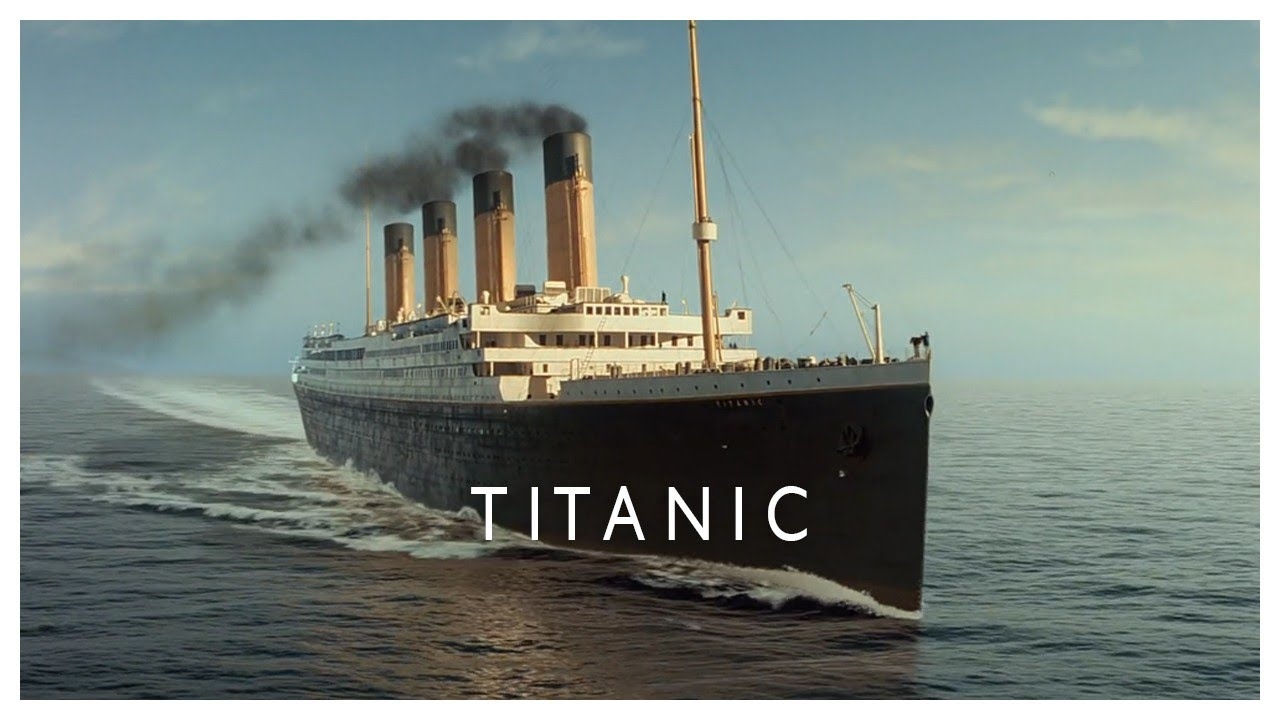

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import os
import warnings
warnings.filterwarnings("ignore")
import mysql
from mysql import connector
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from scipy import stats
import math
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix,classification_report,roc_auc_score
from sklearn.model_selection import cross_val_score
from IPython.display import Image
Image(filename="maxresdefault.jpg")

#### Loading dataset

In [2]:
data=pd.read_csv("tested.csv") # getting csv file
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
data.drop("PassengerId",axis=1,inplace=True) # Dropping unwanted column

# Basic checks

In [4]:
data.head() # displays initial 5 rows

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
data.tail() # displays final 5 rows

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
data.shape # to get the number of rows and columns 

(418, 11)

In [7]:
data.describe() # Statistical information about numerical data

,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
data.describe(include="O") # Statistical information about categorical data

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [9]:
data.info() # Quick summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Name      418 non-null    object 
 3   Sex       418 non-null    object 
 4   Age       332 non-null    float64
 5   SibSp     418 non-null    int64  
 6   Parch     418 non-null    int64  
 7   Ticket    418 non-null    object 
 8   Fare      417 non-null    float64
 9   Cabin     91 non-null     object 
 10  Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
data.duplicated().sum() # checking for duplicated records

0

#### No duplicate records present in data

In [11]:
data.dtypes # to check the datatypes of columns

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [12]:
## Counting the tagert variabe for each class
data.Survived.value_counts() # indicates imbalanced dataset

0    266
1    152
Name: Survived, dtype: int64

# EDA (Exploratory Data Analysis)
## Univariate Analysis

In [13]:
df=data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare', 'Cabin', 'Embarked']]

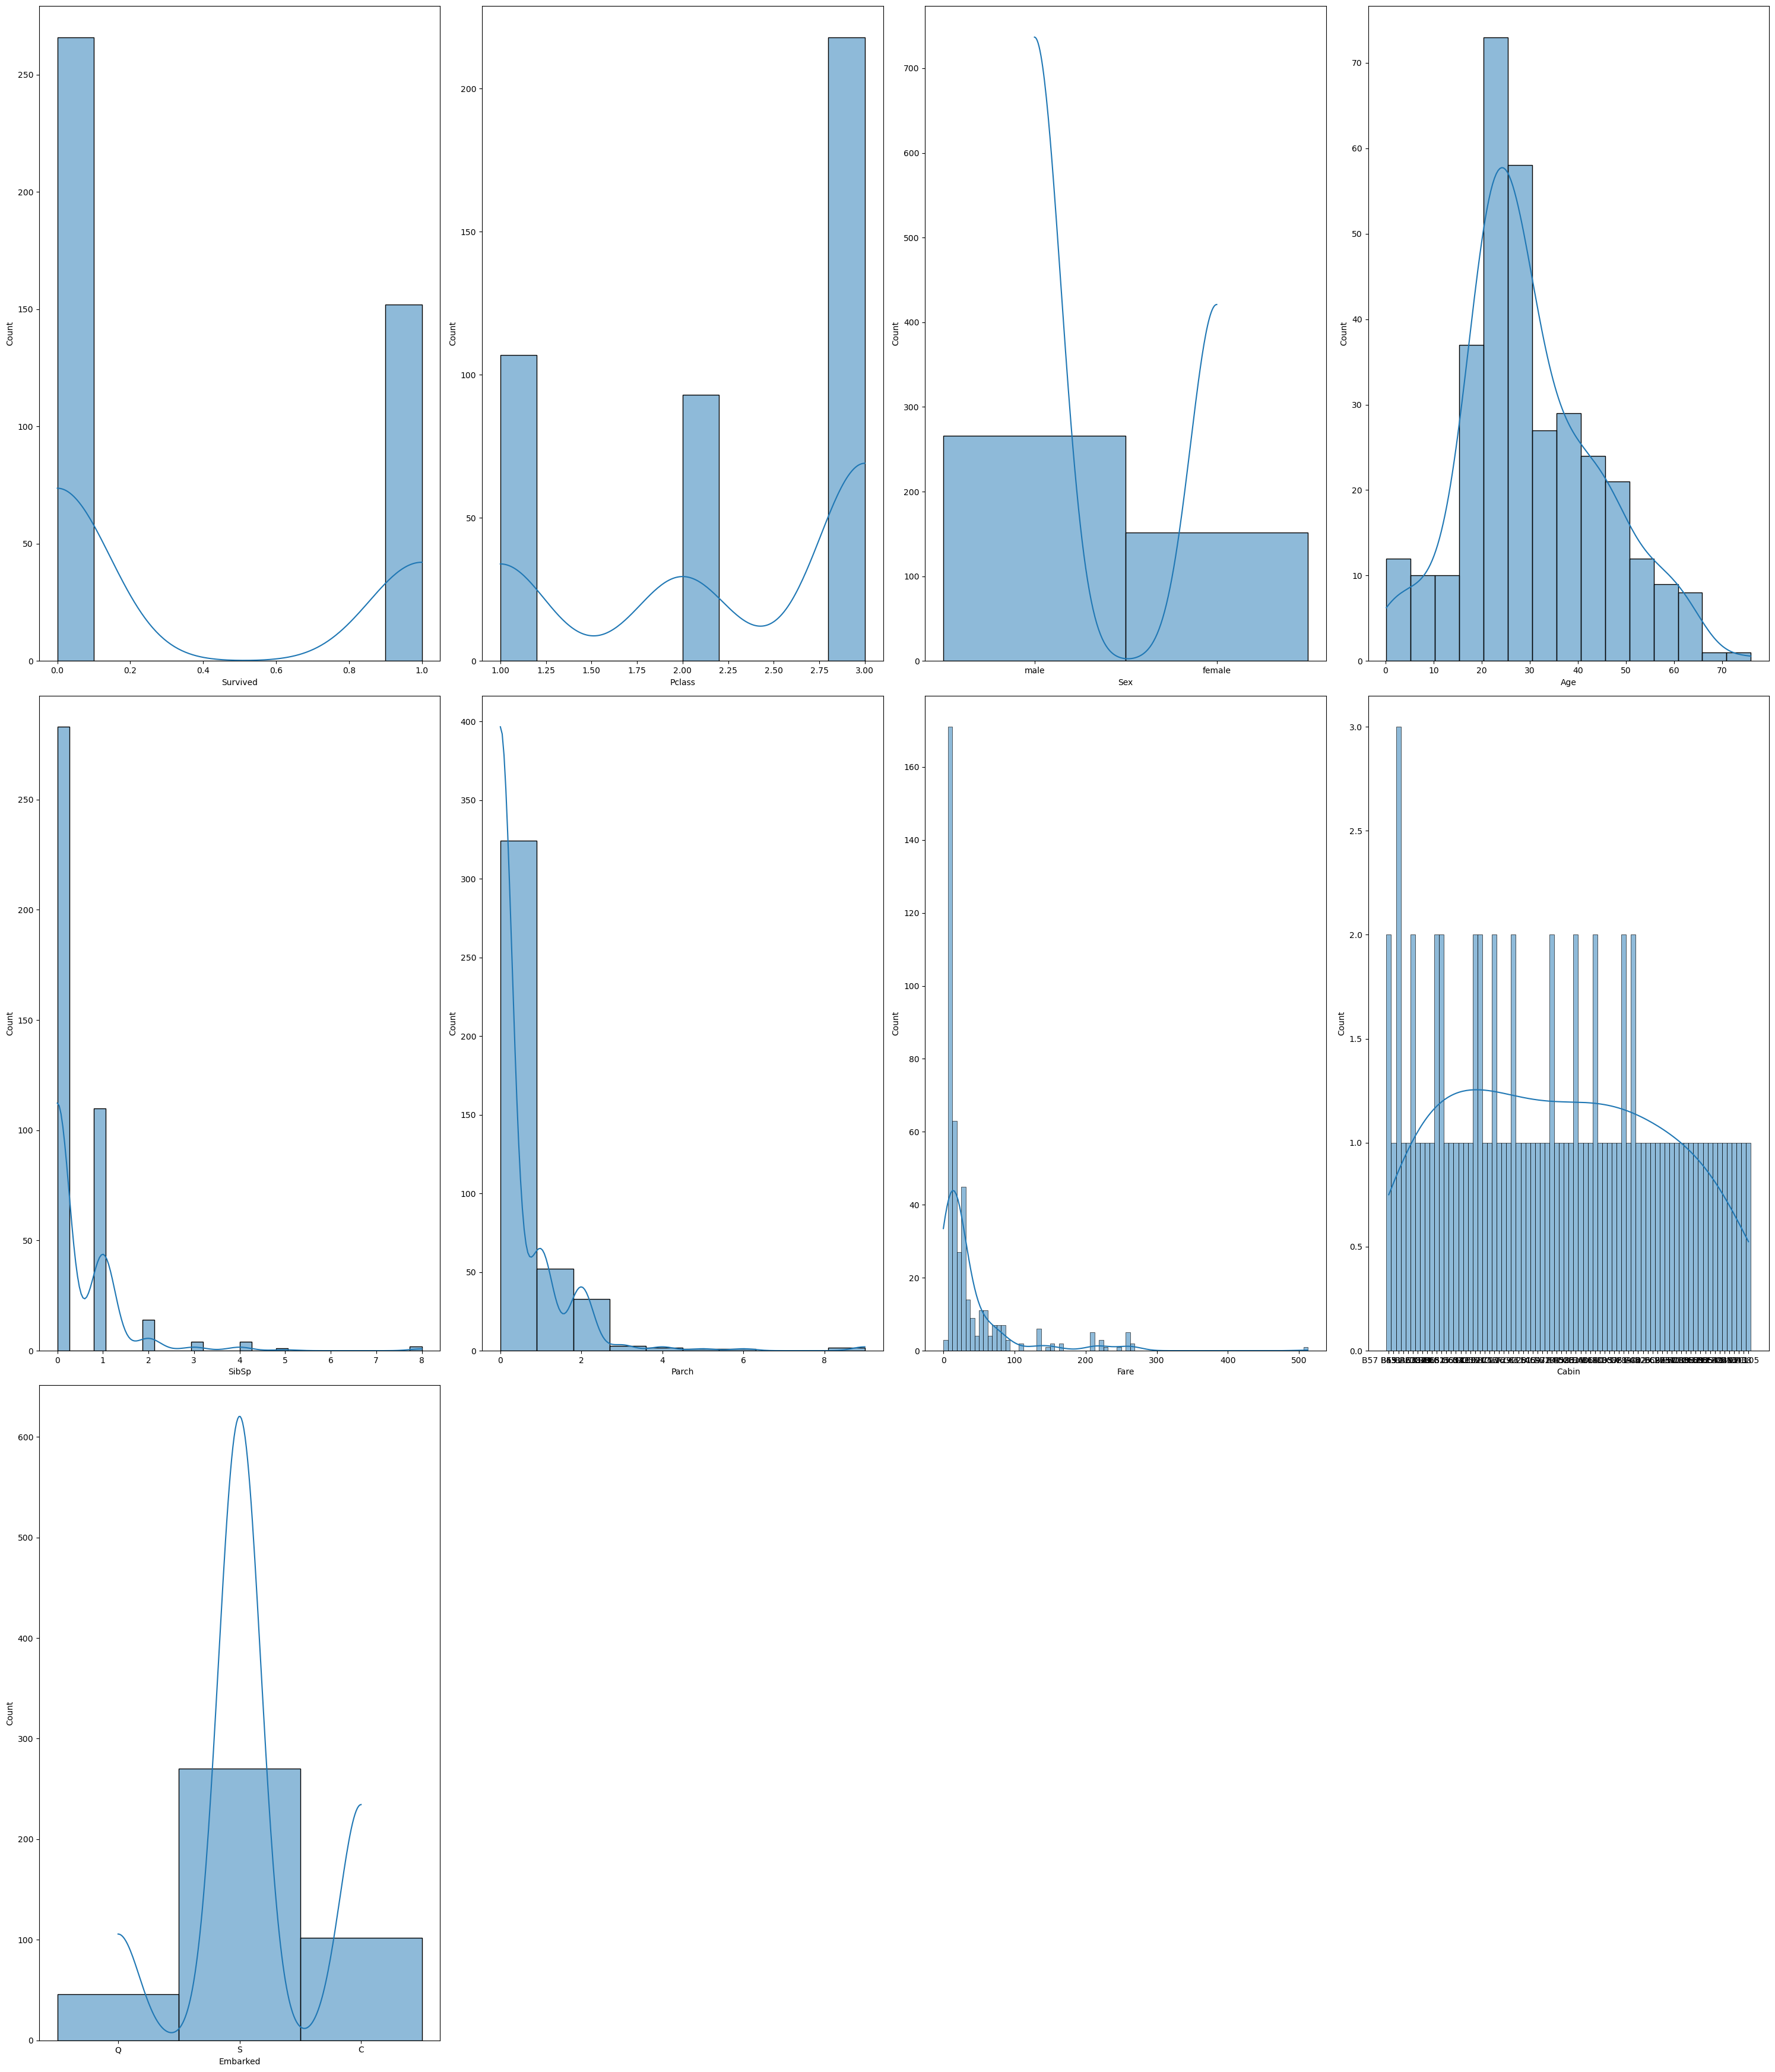

In [14]:
plt.figure(figsize=(30,35))
plotnumber=1
for i in df:
    plt.subplot(3,4,plotnumber)
    sns.histplot(x=i,data=df,kde=True)
    plotnumber+=1
    plt.subplots_adjust(left=0.1, right=0.9,top=0.9,bottom=0.1)

plt.tight_layout()
plt.show()

# Observations
1.In the target feature "survived",0 has maximum value counts than 1.

2.there are more prople present in pclass 3 as compared to 2 and 1.

3.in column "sex" number of males are mpore than number of females.

4.there are more people in age column ranging from 20-40.


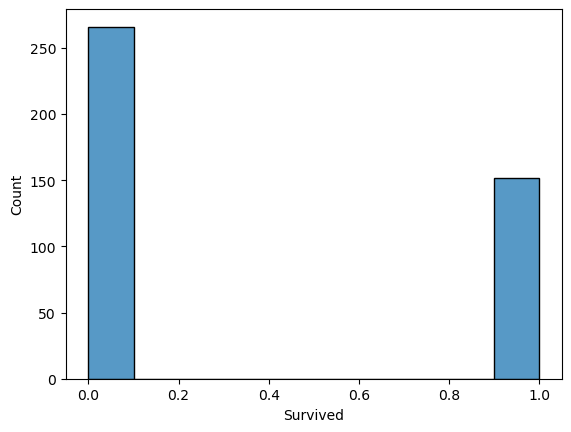

In [15]:
sns.histplot(x=data["Survived"]) # using histogram
plt.show()

### Insight :value counts of 0 is more as compared to 1 in target class

# Bivariate Analysis

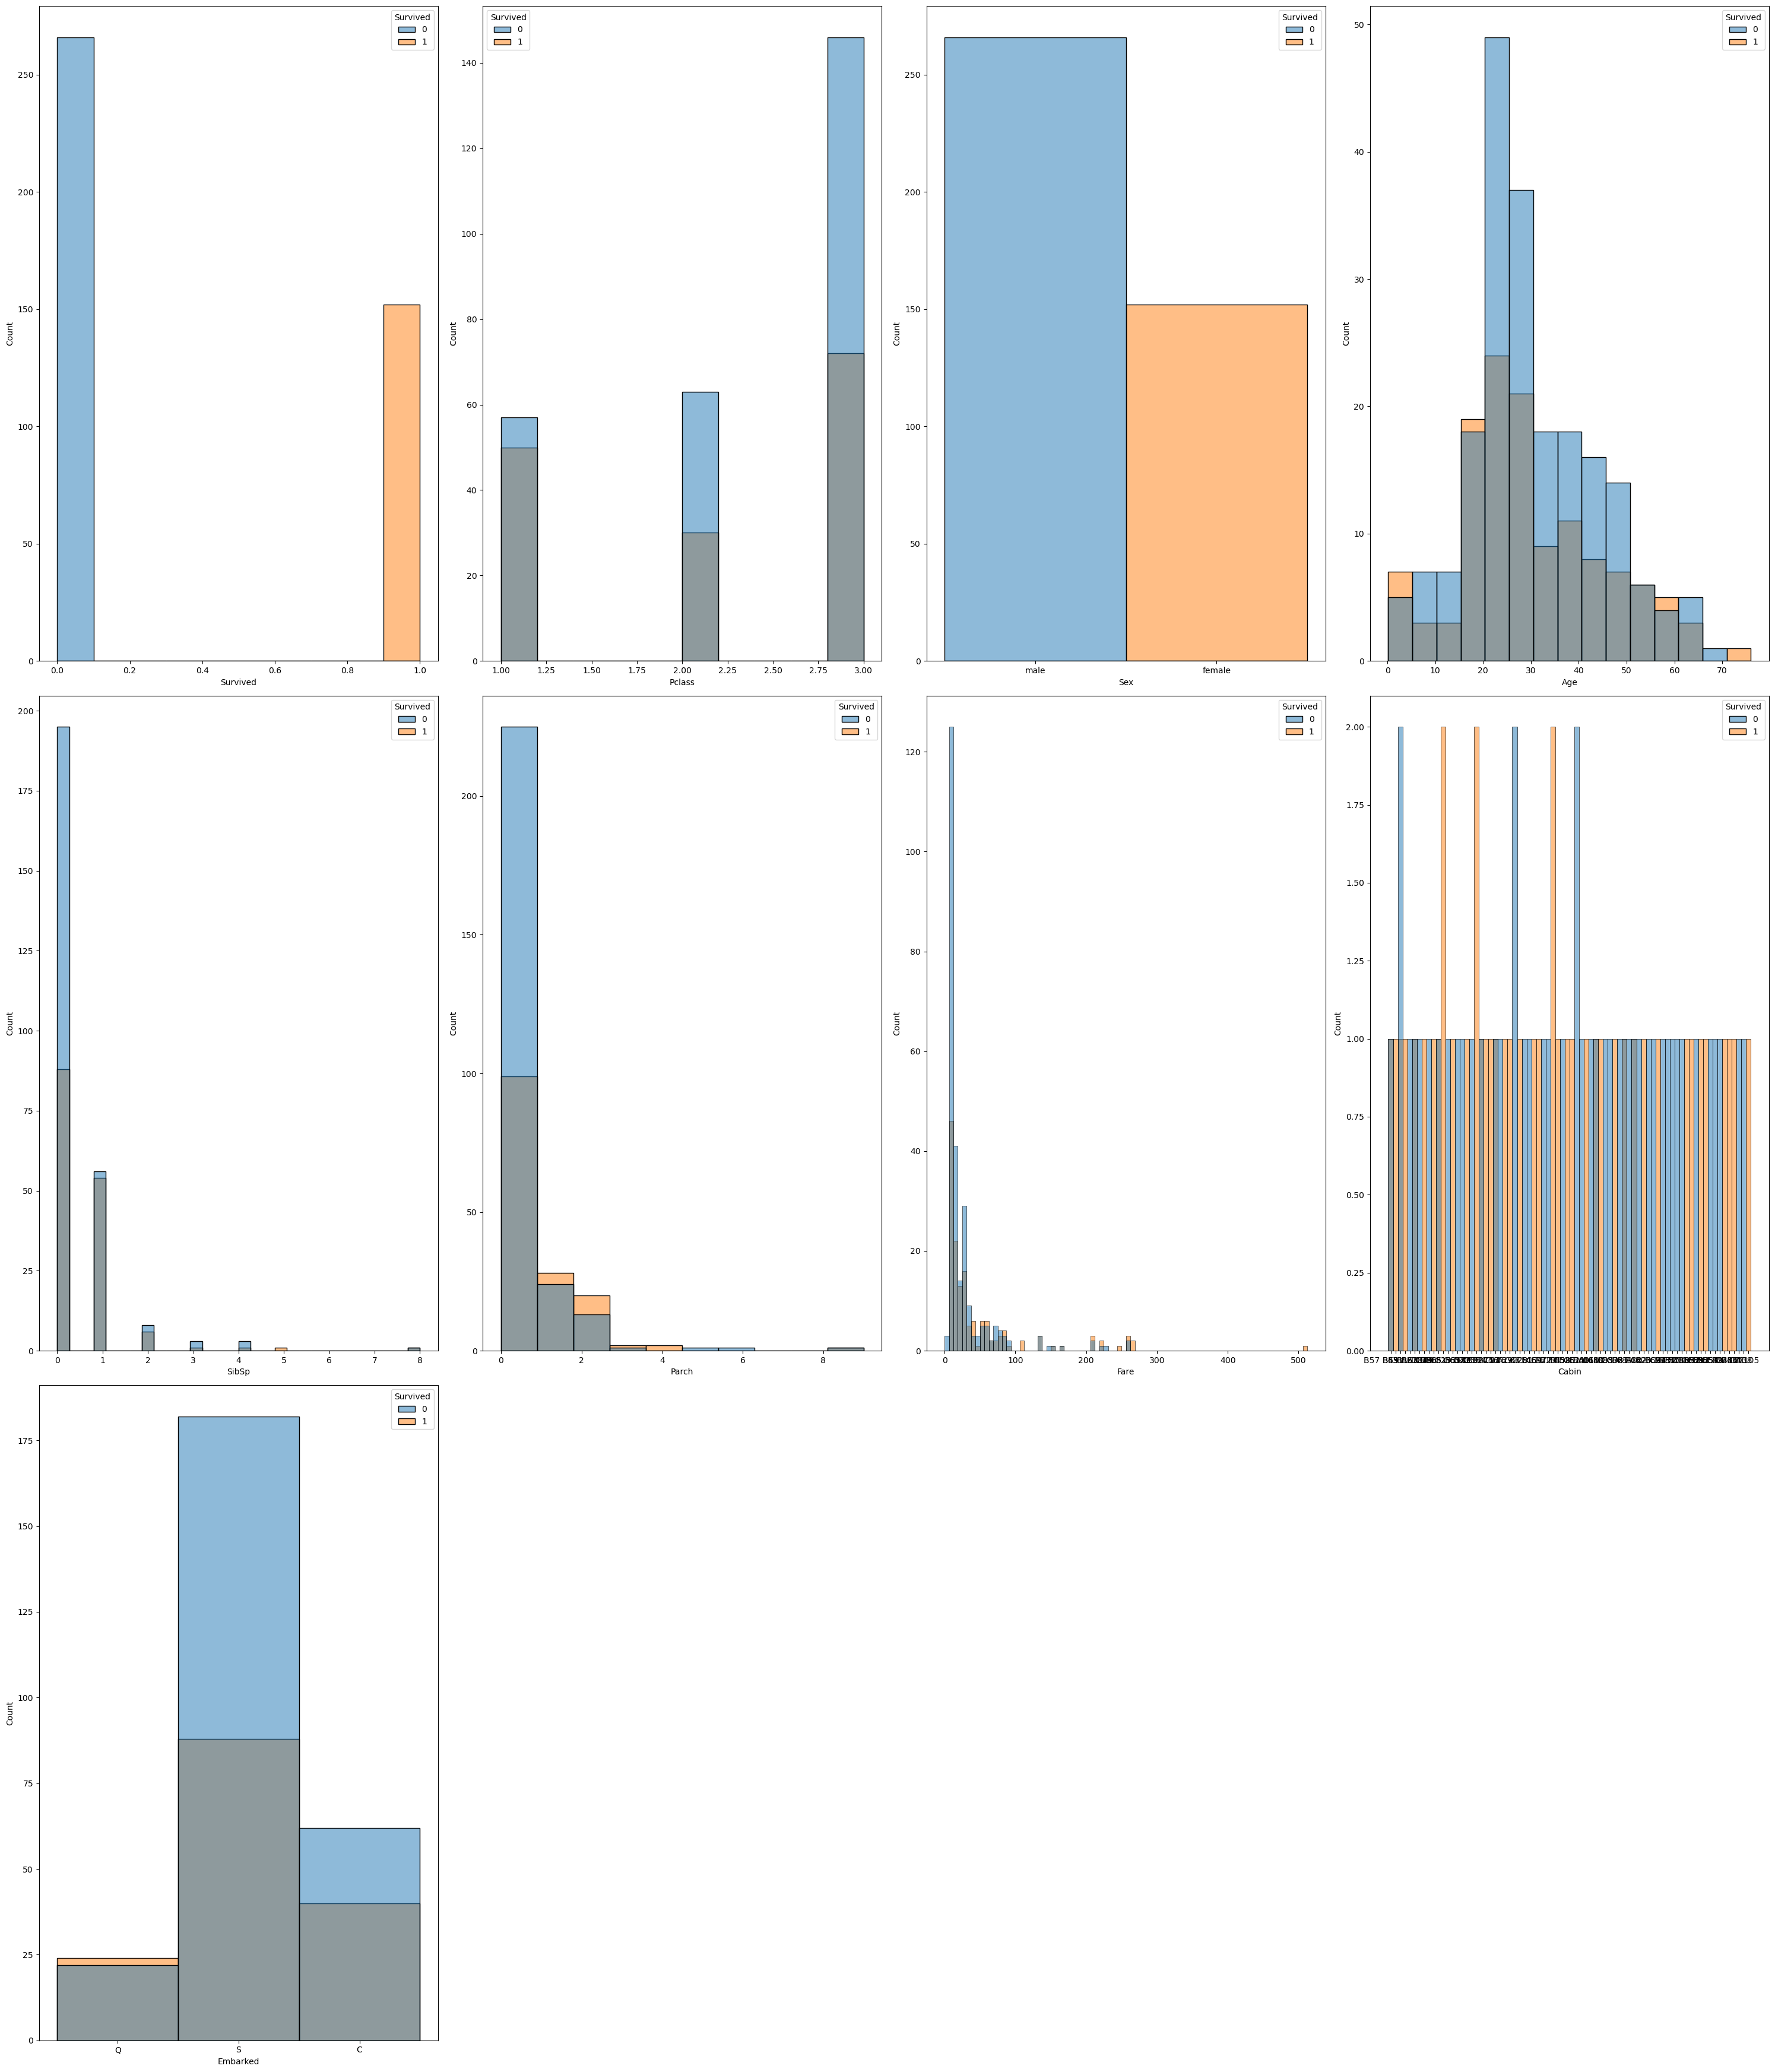

In [16]:
plt.figure(figsize=(30,35))
plotnumber=1
for i in df:
    plt.subplot(3,4,plotnumber)
    sns.histplot(x=i,data=df,hue="Survived")
    plotnumber+=1
    plt.subplots_adjust(left=0.1, right=0.9,top=0.9,bottom=0.1)

plt.tight_layout()
plt.show()

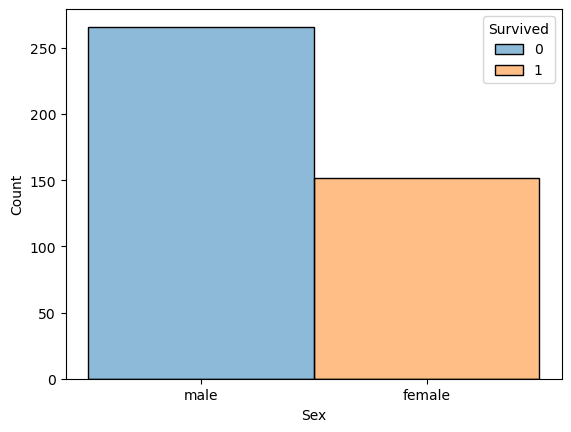

In [17]:
sns.histplot(x=data.Sex,hue=data["Survived"])
plt.show()

### Insight: from the above plot we can see that male gender has more number of survival counts than female

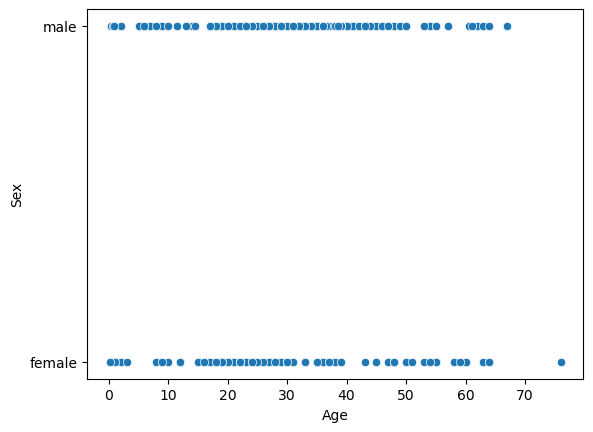

In [18]:
sns.scatterplot(x=data.Age,y=data.Sex) # using scatterplot
plt.show()

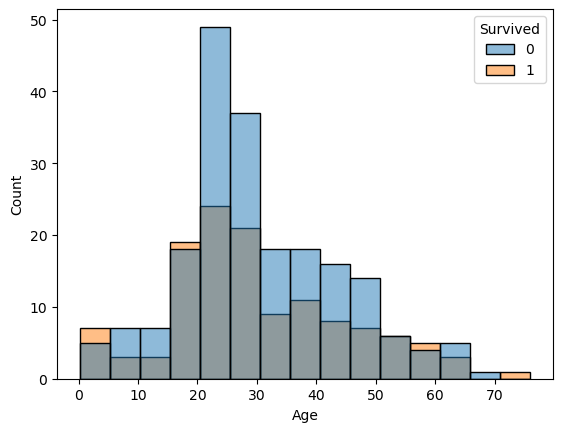

In [19]:
sns.histplot(x=data.Age,hue=data["Survived"])
plt.show()


### in above column the maximum age of people ranges from 20-40

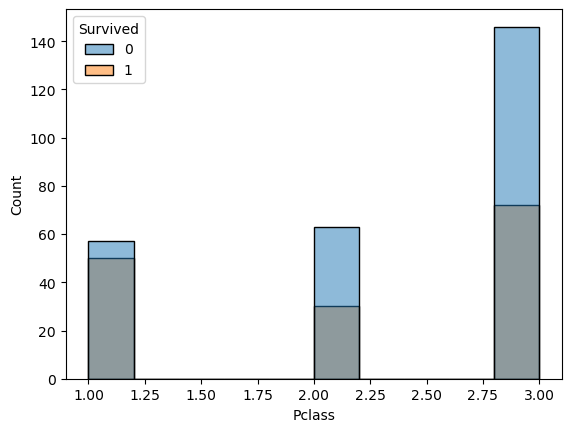

In [20]:
sns.histplot(x=data.Pclass,hue=data["Survived"])
plt.show()

### there are more prople present in pclass 3

# Data preprocessing

### Checking for null values

In [21]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [22]:
data.Age=data.Age.fillna(data["Age"].median())

In [23]:
data.Cabin=data.Cabin.fillna(data["Cabin"].mode()[0])

In [24]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        1
Cabin       0
Embarked    0
dtype: int64

In [25]:
data.dropna(inplace=True) # dropping remaining null values

In [26]:
data.isnull().sum() # no null values left

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# Encoding

In [27]:
data.dtypes # checking datatypes of each column

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [28]:
# label Encoding
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [29]:
lb=LabelEncoder()
for column in data.columns: # using for loop
    if data[column].dtype=="object":
        data[column]=lb.fit_transform(data[column])

In [30]:
(data.dtypes=="object").sum() # no categorical columns left

0

# handling outliers

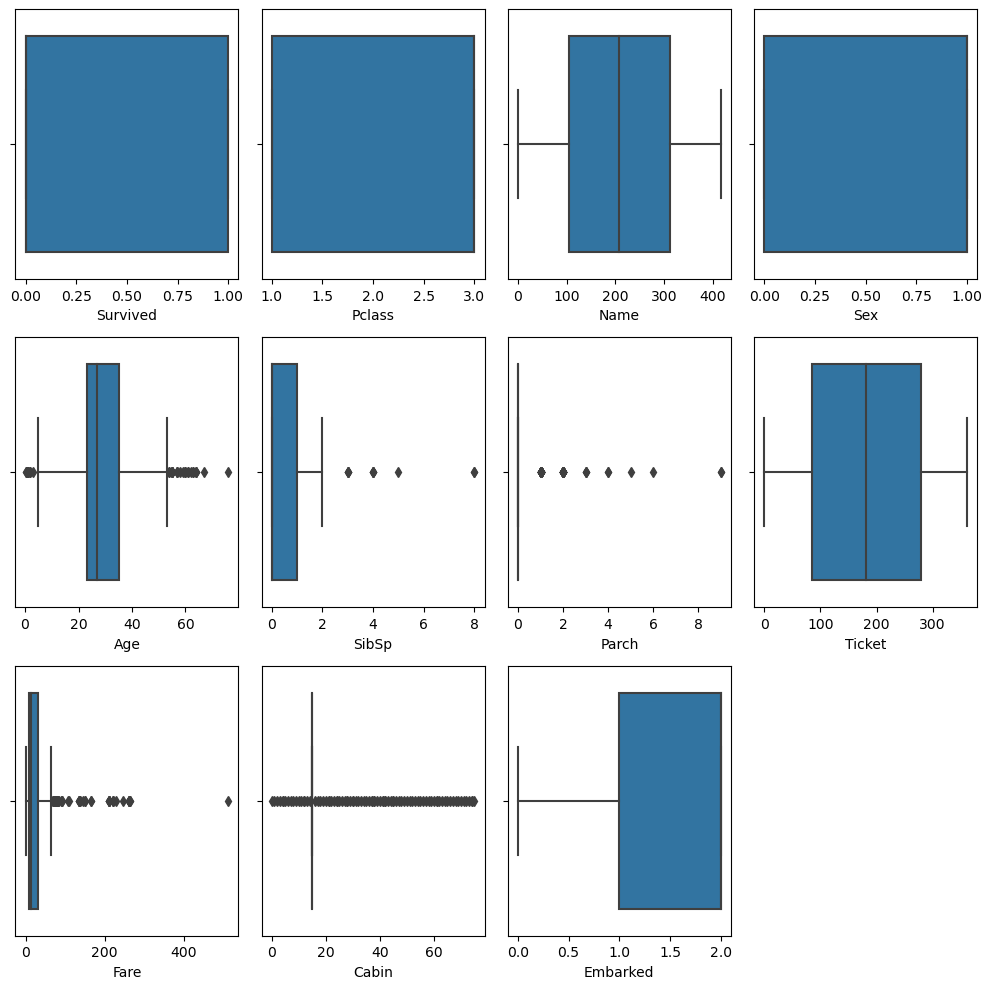

In [31]:
#Using boxplot to detect outliers
plt.figure(figsize=(10,10),facecolor='white')

plotnumber=1 # initialization of plotnumber

for column in data: # using for loop
        ax=plt.subplot(3,4,plotnumber) # subplot
        sns.boxplot(x = data[column]) 
        plotnumber+=1 # increamentation
plt.tight_layout() 

In [32]:
# Imputing outliers manually using median

data.loc[data.Age>65,"Age"]=np.median(data.Age)

data.loc[data.SibSp>2,"SibSp"]=np.median(data.SibSp)

data.loc[data.Fare>100,"Fare"]=np.median(data.Fare)

In [33]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,206,1,34.5,0,0,152,7.8292,15,1
1,1,3,402,0,47.0,1,0,221,7.0000,15,2
2,0,2,269,1,62.0,0,0,73,9.6875,15,1
3,0,3,407,1,27.0,0,0,147,8.6625,15,2
4,1,3,178,0,22.0,1,1,138,12.2875,15,2


# Checking correlation

In [34]:
data.corr()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,1.000000,-0.107203,-0.065067,-1.000000,0.006174,0.145604,0.158534,0.048529,0.123380,0.064225,-0.075106
Pclass,-0.107203,1.000000,0.036358,0.107203,-0.464024,-0.156064,0.019581,0.292453,-0.559075,-0.356973,0.226856
Name,-0.065067,0.036358,1.000000,0.065067,-0.040192,0.059707,-0.008953,0.024051,-0.021855,-0.025416,-0.083815
Sex,-1.000000,0.107203,0.065067,1.000000,-0.006174,-0.145604,-0.158534,-0.048529,-0.123380,-0.064225,0.075106
Age,0.006174,-0.464024,-0.040192,-0.006174,1.000000,0.049055,-0.035896,-0.138198,0.224224,0.123161,-0.169840
SibSp,0.145604,-0.156064,0.059707,-0.145604,0.049055,1.000000,0.226233,-0.050459,0.271860,0.101801,-0.043211
Parch,0.158534,0.019581,-0.008953,-0.158534,-0.035896,0.226233,1.000000,0.110210,0.274088,0.004809,0.055293
Ticket,0.048529,0.292453,0.024051,-0.048529,-0.138198,-0.050459,0.110210,1.000000,-0.174647,-0.169149,0.093114
Fare,0.123380,-0.559075,-0.021855,-0.123380,0.224224,0.271860,0.274088,-0.174647,1.000000,0.224796,-0.089419
Cabin,0.064225,-0.356973,-0.025416,-0.064225,0.123161,0.101801,0.004809,-0.169149,0.224796,1.000000,-0.178847


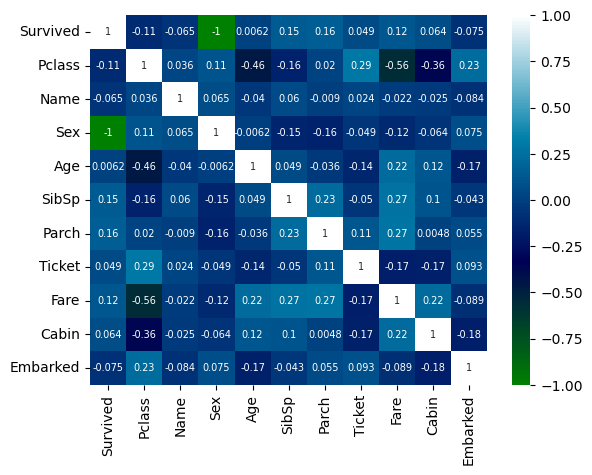

In [35]:
# using heatmap to visualize correlated columns
sns.heatmap(data.corr(),annot=True,cmap="ocean", annot_kws={"size":7})
plt.show()

#### There are no highly correlated columns

### Selecting dependent and independent values

In [36]:
x=data.drop("Survived",axis=1) # independent features
y=data[["Survived"]] # dependent feature

In [37]:
x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,206,1,34.5,0,0,152,7.8292,15,1
1,3,402,0,47.0,1,0,221,7.0000,15,2
2,2,269,1,62.0,0,0,73,9.6875,15,1
3,3,407,1,27.0,0,0,147,8.6625,15,2
4,3,178,0,22.0,1,1,138,12.2875,15,2


In [38]:
y.head()

,Survived
0,0
1,1
2,0
3,0
4,1


## Scaling of data

In [39]:
from sklearn.preprocessing import MinMaxScaler # using min max scaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x) # data transformation


## Splitting the data into train and test set

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=42) # splitting data into train and test set

## Balancing the target class using SMOTE

In [41]:
from imblearn.over_sampling import SMOTE # using SMOTE to balance
from collections import Counter

In [42]:
sm=SMOTE()
x_sm,y_sm=sm.fit_resample(x_train,y_train)

In [43]:
print(Counter(y_train))
print(Counter(y_sm)) # Balanced data

Counter({'Survived': 1})
Counter({'Survived': 1})


In [44]:
print("target class before balancing:",y_train.value_counts()) 
print("target class after balancing:",y_sm.value_counts())


target class before balancing: Survived
0           186
1           105
dtype: int64
target class after balancing: Survived
0           186
1           186
dtype: int64


# Model building
## Logistic Regression

### For testing

In [45]:
lr=LogisticRegression()
lr.fit(x_sm,y_sm)
y_pred=lr.predict(x_test)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [46]:
acc=accuracy_score(y_test,y_pred) 
acc

1.0

### For training

In [47]:
y_pred_train=lr.predict(x_sm)


In [48]:
acc_train=accuracy_score(y_sm,y_pred_train)
acc_train

1.0

In [49]:
# Printing classification report and confusion metrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[79  0]
 [ 0 47]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        47

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



## SVM

### For testing

In [50]:
svc=SVC()
svc.fit(x_sm,y_sm)
y_pred1=svc.predict(x_test)


In [51]:
acc1=accuracy_score(y_test,y_pred1)
acc1

1.0

### For training

In [52]:
y_pred_train1=svc.predict(x_sm)

In [53]:
acc_train1=accuracy_score(y_sm,y_pred_train1)
acc_train1

1.0

In [54]:
# Printing classification report and confusion metrix

print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[79  0]
 [ 0 47]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        47

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



## Decision Tree

### For testing

In [55]:
dt=DecisionTreeClassifier()
dt.fit(x_sm,y_sm)
y_pred2=dt.predict(x_test)

In [56]:
acc2=accuracy_score(y_test,y_pred2)
acc2

1.0

### For training

In [57]:
y_pred_train2=dt.predict(x_sm)
acc_train2=accuracy_score(y_sm,y_pred_train2)
acc_train2

1.0

In [58]:
# Printing classification report and confusion metrix

print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[79  0]
 [ 0 47]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        47

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



## Random Forest

### For testing

In [59]:
rf=RandomForestClassifier()
rf.fit(x_sm,y_sm)
y_pred3=rf.predict(x_test)


In [60]:
acc3=accuracy_score(y_test,y_pred3)
acc3

1.0

### For training

In [61]:
y_pred_train3=rf.predict(x_sm)
acc_train3=accuracy_score(y_sm,y_pred_train3)
acc_train3

1.0

In [62]:
# Printing classification report and confusion metrix

print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[79  0]
 [ 0 47]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        47

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



# Gradient Boosing

### For testing

In [63]:
gb=GradientBoostingClassifier()
gb.fit(x_sm,y_sm)
y_pred4=gb.predict(x_test)

In [64]:
acc4=accuracy_score(y_test,y_pred4)
acc4

1.0

### For training

In [65]:
y_pred_train4=gb.predict(x_sm)
acc_train4=accuracy_score(y_sm,y_pred_train4)
acc_train4

1.0

In [66]:
# Printing classification report and confusion metrix

print(confusion_matrix(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[79  0]
 [ 0 47]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        47

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



## XGBoost

### For testing

In [67]:
xgb=XGBClassifier()
xgb.fit(x_sm,y_sm)
y_pred5=xgb.predict(x_test)

In [68]:
acc5=accuracy_score(y_test,y_pred5)
acc5

1.0

### For Training

In [69]:
y_pred_train5=xgb.predict(x_sm)
acc_train5=accuracy_score(y_sm,y_pred_train5)
acc_train5

1.0

In [70]:
# Printing classification report and confusion metrix

print(confusion_matrix(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

[[79  0]
 [ 0 47]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        47

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



# Comparing all the results

In [71]:
dict={"Accuracy (train)":[acc_train,acc_train1,acc_train2,acc_train3,acc_train4,acc_train5],
     "Accuracy (test)":[acc,acc1,acc2,acc3,acc4,acc5]}

In [72]:
a=pd.DataFrame(dict)
a

,Accuracy (train),Accuracy (test)
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
5,1.0,1.0


## Conclusion: All the algorithms performed very well .